# Hate Crime Analysis

- Objectives of this project
    * Investigate the main types of hate crime
    * Analyse the possible correlation of Presidency with Hate Crime (Could Trump be at least partially responsable for the increasing of hate crime?)

### Data Collected from the FBI hate-crime reports dataset. (This analysis goes from 2005 to 2017)

[Source](https://ucr.fbi.gov/hate-crime/ "FBI DATASET")

### Definition of HATE CRIME:
   > "A crime motivated by racial, sexual, or other prejudice, typically one involving violence."

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
from IPython.display import display

## Preprocessing Data

In [2]:
df_2005 = pd.ExcelFile('table-2005.xls')
df_2006 = pd.ExcelFile('table-2006.xls')
df_2007 = pd.ExcelFile('table-2007.xls')
df_2008 = pd.ExcelFile('table-2008.xls')
df_2009 = pd.ExcelFile('table-2009.xls')
df_2010 = pd.ExcelFile('table-2010.xls')
df_2011 = pd.ExcelFile('table-2011.xls')
df_2012 = pd.ExcelFile('table-2012.xls')
df_2013 = pd.ExcelFile('table-2013.xls')
df_2014 = pd.ExcelFile('table-2014.xls')
df_2015 = pd.ExcelFile('table-2015.xls')
df_2016 = pd.ExcelFile('table-2016.xls')
df_2017 = pd.ExcelFile('table-2017.xls')

## Parse Excel Files into a normal Dataframe

In [3]:
df_2005 = df_2005.parse('Table 1')
df_2006 = df_2006.parse('Table 1')
df_2007 = df_2007.parse('Table 1')
df_2008 = df_2008.parse('Table 1')
df_2009 = df_2009.parse('Table 1')
df_2010 = df_2010.parse('Table 1')
df_2011 = df_2011.parse('Table 1')
df_2012 = df_2012.parse('Table 1')
df_2013 = df_2013.parse('Table 1')
df_2014 = df_2014.parse('Table 1')
df_2015 = df_2015.parse('Table 1')
df_2016 = df_2016.parse('Table 1')
df_2017 = df_2017.parse('Table 1')

## Merging all the dataframes from 2005 to 2017

In [4]:
header = {"Unnamed: 1": "Incidents", "Unnamed: 2": "Offenses", "Unnamed: 3": "Victims", "Unnamed: 4": "Known Offenders", "Table 1": "Motivations", "Table 1 ": "Motivations"}
super_df = [df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017]
data = pd.DataFrame(columns=["Incidents", "Offenses", "Victims", "Known Offenders", "Motivations", "Year"])
data = data.set_index("Motivations")
year = 2005
for df in super_df:
    df = df.rename(columns=header)
    df = df.iloc[2:]
    df["Year"] = year
    data = data.append(df)
    year += 1
    


/Users/aderito.xavier/developer/python/DS/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [5]:
print(data.shape)
print(data["Unnamed: 5"].isnull().values.sum())
print(data["Unnamed: 6"].isnull().values.sum())
print(data["Unnamed: 7"].isnull().values.sum())

(481, 9)
481
478
480


In [6]:
data = data.drop(axis=1, columns=["Unnamed: 5", "Unnamed: 6", "Unnamed: 7"])

data = data.fillna("nan")
data = data[data["Incidents"] != "nan"]

data = data.set_index("Motivations")
data = data.rename(index={"Race/Ethnicity/Ancestry:": "Race", "Race:": "Race", "Religion:": "Religion", "Sexual Orientation:": "Sexual Orientation",
                         "Disability:": "Disability", "Gender:": "Gender", "Gender Identity:": "Gender Identity", "Multiple-Bias Incidents3": "Multiple-Bias Incidents3"})
data.loc[data["Year"] == 2005]


,Incidents,Known Offenders,Offenses,Victims,Year
Motivations,,,,,
Total,7163,6804,8380,8804,2005
Single-Bias Incidents,7160,6800,8373,8795,2005
Race,3919,3913,4691,4895,2005
Anti-White,828,963,935,975,2005
Anti-Black,2630,2581,3200,3322,2005
Anti-American Indian/Alaskan Native,79,73,95,97,2005
Anti-Asian/Pacific Islander,199,163,231,240,2005
"Anti-Multiple Races, Group",183,133,230,261,2005
Religion,1227,580,1314,1405,2005


In [7]:
print(data.index)

Index(['Total', 'Single-Bias Incidents', 'Race', 'Anti-White', 'Anti-Black',
       'Anti-American Indian/Alaskan Native', 'Anti-Asian/Pacific Islander',
       'Anti-Multiple Races, Group', 'Religion', 'Anti-Jewish',
       ...
       'Disability', 'Anti-Physical', 'Anti-Mental', 'Gender', 'Anti-Male',
       'Anti-Female', 'Gender Identity', 'Anti-Transgender',
       'Anti-Gender Non-Conforming', 'Multiple-Bias Incidents3'],
      dtype='object', name='Motivations', length=440)


In [12]:
total = data.loc["Total"]
single_bias = data.loc["Single-Bias Incidents"]
race = data.loc["Race"]
religion = data.loc["Religion"]
sexual_orientation = data.loc["Sexual Orientation"]
disability = data.loc["Disability"]
gender = data.loc["Gender"]

In [17]:
religion

,Incidents,Known Offenders,Offenses,Victims,Year
Motivations,,,,,
Religion,1227,580,1314,1405,2005
Religion,1462,705,1597,1750,2006
Religion,1400,576,1477,1628,2007
Religion,1519,632,1606,1732,2008
Religion,1303,586,1376,1575,2009
Religion,1322,606,1409,1552,2010
Religion,1233,590,1318,1480,2011
Religion,1099,484,1166,1340,2012
Religion,1031,682,1163,1223,2013


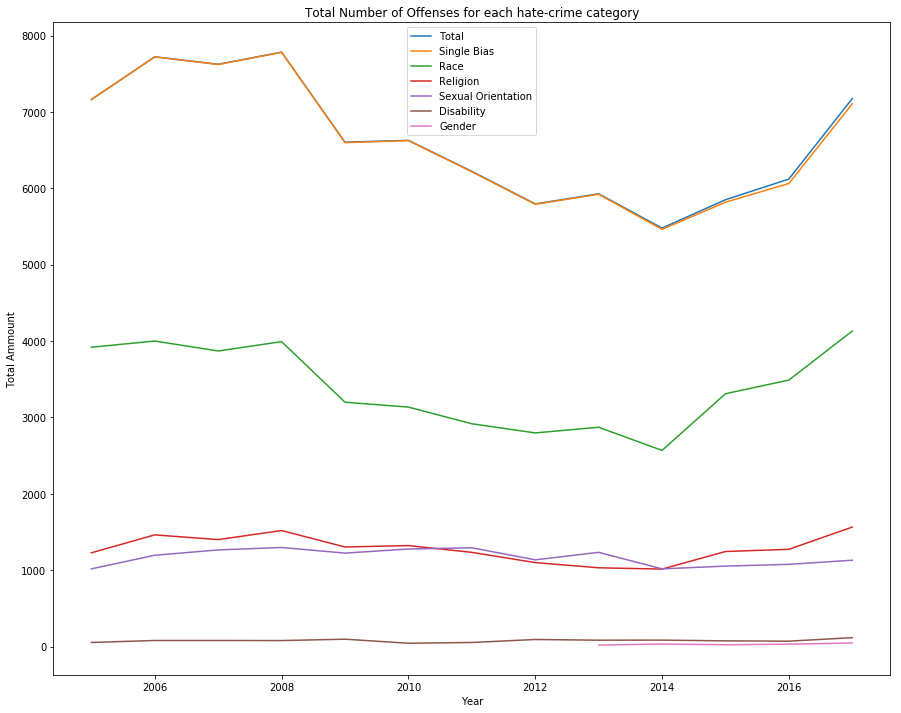

In [20]:
width = 15
height = 12
plt.figure(figsize=(width, height))
plt.plot(total["Year"], total["Incidents"])
plt.plot(single_bias["Year"], single_bias["Incidents"])
plt.plot(race["Year"], race["Incidents"])
plt.plot(religion["Year"], religion["Incidents"])
plt.plot(sexual_orientation["Year"], sexual_orientation["Incidents"])
plt.plot(disability["Year"], disability["Incidents"])
plt.plot(gender["Year"], gender["Incidents"])
plt.title("Total Number of Offenses for each hate-crime category")
plt.ylabel("Total Ammount")
plt.xlabel("Year")
plt.legend(['Total', 'Single Bias', 'Race', 'Religion', 'Sexual Orientation', 'Disability', 'Gender'])
plt.show()

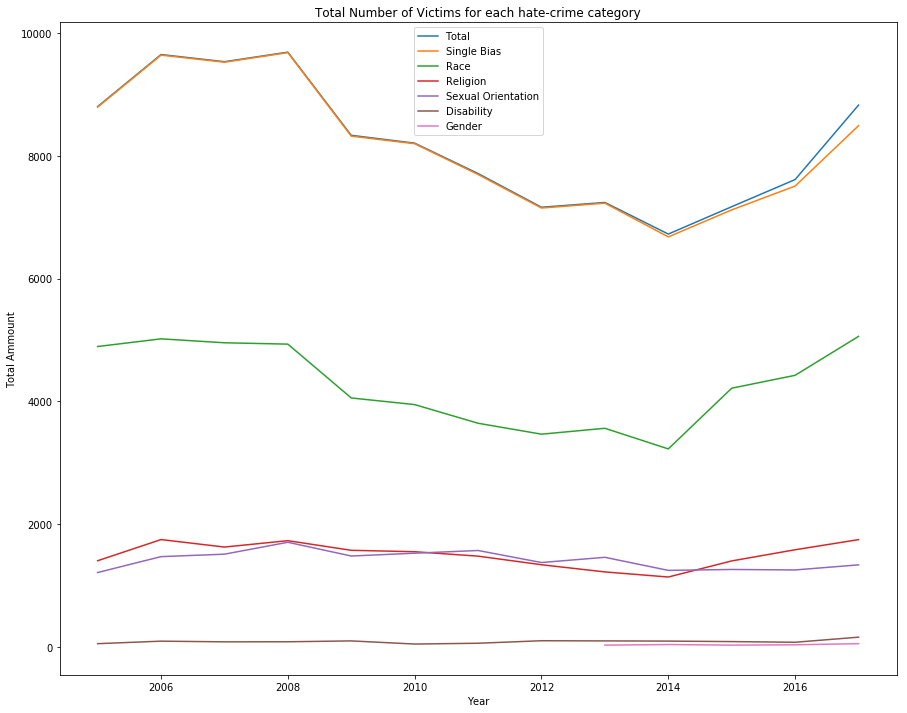

In [21]:
width = 15
height = 12
plt.figure(figsize=(width, height))
plt.plot(total["Year"], total["Victims"])
plt.plot(single_bias["Year"], single_bias["Victims"])
plt.plot(race["Year"], race["Victims"])
plt.plot(religion["Year"], religion["Victims"])
plt.plot(sexual_orientation["Year"], sexual_orientation["Victims"])
plt.plot(disability["Year"], disability["Victims"])
plt.plot(gender["Year"], gender["Victims"])
plt.title("Total Number of Victims for each hate-crime category")
plt.ylabel("Total Ammount")
plt.xlabel("Year")
plt.legend(['Total', 'Single Bias', 'Race', 'Religion', 'Sexual Orientation', 'Disability', 'Gender'])
plt.show()